# **Análise Exploratória e Tratamento de Dados**

O objetivo aqui é observar os dados, identificar problemas e realizar os ajustes necessários.  
Pra isso, vou usar comandos informativos pra entender melhor o conteúdo da base, e comandos transformativos quando for necessário corrigir valores nulos, fora da faixa permitida ou com erro de digitação.  

A base representa jogadores de um jogo de RPG, e algumas regras devem ser respeitadas:

- O `score` deve estar entre 0 e 1.000.000  
- O `nivel` deve estar entre 0 e 1000  
- A `idade` deve estar entre 0 e 100  

Com base nessas informações, vou explorar os dados e tratar o que estiver fora do esperado.


In [172]:
# importar as bibliotecas
import pandas as pd
import seaborn as srn
import statistics as sts

# Carregar o arquivo CSV
df = pd.read_csv("jogadores.csv")

# Exibir as primeiras linhas do dataframe
df.head()

,id,score,nivel,categoria,idade,pais
0,1,321057.0,321.0,elfo,43.0,United States
1,2,495527.0,466.0,mago,16.0,Canada
2,3,700848.0,255.0,NaN,54.0,United States
3,4,985558.0,679.0,mago,87.0,Brazil
4,5,517633.0,752.0,guerreiro,69.0,Japan


In [135]:
# Exibir as ultimas linhas do dataframe
df.tail()

,id,score,nivel,categoria,idade,pais
995,996,146132.0,417.0,elfo,78.0,Japan
996,997,845482.0,588.0,orc,69.0,Portugal
997,998,230131.0,660.0,mago,57.0,Japan
998,999,635044.0,731.0,orc,17.0,Brazil
999,1000,317887.0,477.0,orc,64.0,Brazil


In [136]:
# formato do dataframe para exibir o numero de linhas e colunas
df.shape

(1000, 6)

Vemos aqui que o dataframe possui 1000 linhas e 6 colunas o que condiz com o numero de colunas e os numeros finais do id que vimos na exibição das primeiras e ultimas linhas do dataframe.

# **Análise Exploratória**

Aqui vou dar uma olhada geral nos dados pra entender melhor o que tem na base, ver se tem coisa faltando ou errada, e começar a identificar possíveis problemas que precisam de tratamento.

In [137]:
# verificação de campos nulos no dataframe
df.isnull().sum()

id           0
score        2
nivel        2
categoria    3
idade        3
pais         2
dtype: int64

Vemos que existem 2 valores nulos nas colunas 'score', 'nivel' e 'pais', e temos 3 valores nulos nas colunas 'categoria' e 'idade'

## Dados categóricos

Agora vou analisar as colunas categóricas da base, agrupando os dados pra ver quantos tem de cada tipo e usando gráficos de barras pra identificar possíveis erros de digitação ou valores fora do padrão.

* ### Coluna: categoria

In [138]:
# agrupando e contando os dados da coluna categoria
df.groupby(['categoria']).size()

categoria
elfo         238
guerreiro    242
m@go           1
mago         275
orc          241
dtype: int64

<Axes: xlabel='categoria'>

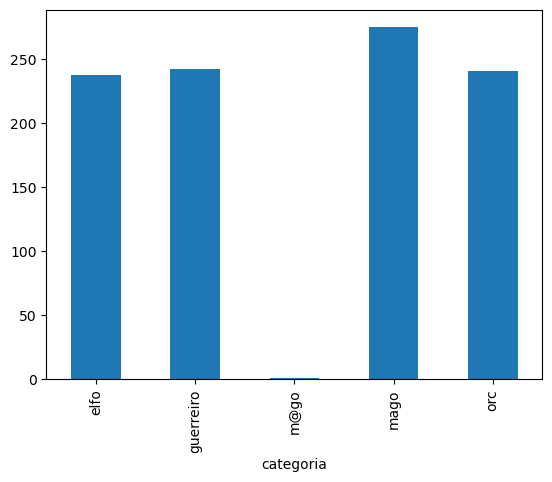

In [139]:
# gráfico de barras
df.groupby(['categoria']).size().plot.bar()

Com essa análise foi possível ver que a coluna categoria possui um dado com erro de digitação: "m@go", quando deveria ser "mago", vale também lembrar que "mago" é o valor mais recorrente da coluna.

* ### Coluna: pais

In [141]:
# agrupando e contando os dados da coluna pais
df.groupby(['pais']).size()

pais
%apan               1
Australia           7
Brazil            279
C#nada              1
Canada             93
Italy              10
Japan             130
Mexico             74
Portuga&            1
Portugal          222
Spain              14
United Kingdom     16
United States     150
dtype: int64

<Axes: xlabel='pais'>

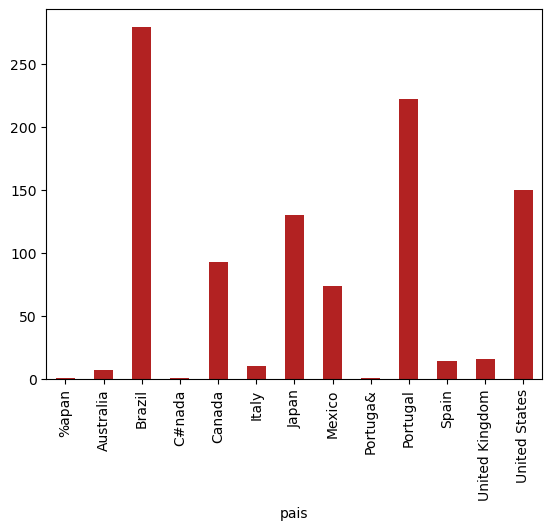

In [143]:
# gráfico de barras
df.groupby(['pais']).size().plot.bar(color="FireBrick")

Com essa análise foi possível ver que a coluna categoria possui 3 erros de digitação nos dados: "%apan", "C#nada" e "Portuga&", quando deveriam ser "Japan", "Canada" e "Portugal" respectivamente. Vale também lembrar que "Brazil" é o valor mais recorrente da coluna.

## Dados numéricos

Agora vou analisar as colunas numéricas da base, começando com um resumo estatístico e depois visualizando a distribuição dos dados com boxplots e histogramas. Isso vai ajudar a identificar valores fora do esperado ou inconsistências.

In [145]:
# análise geral
df.describe()

,id,score,nivel,idade
count,1000.000000,998.000000,998.000000,997.000000
mean,500.500000,496350.856713,495.098196,56.822467
std,288.819436,283458.860428,288.395089,25.249907
min,1.000000,-464.000000,-516.000000,12.000000
25%,250.750000,259577.250000,247.750000,35.000000
50%,500.500000,497023.500000,493.500000,59.000000
75%,750.250000,745172.500000,742.000000,78.000000
max,1000.000000,998871.000000,1000.000000,133.000000


O describe() mostra um resumo básico das colunas numéricas. Dá pra ver que os valores de score e nivel chegam a ser negativos, o que já é um sinal de erro, já que pelas regras da base esses valores devem estar entre 0 e 1.000.000 (score) e entre 0 e 1000 (nivel).  
A coluna idade também tem um valor máximo de 133, que passa do limite permitido (idade válida vai de 0 a 100).  
Então, mesmo sem analisar graficamente, esse resumo já mostra que existem dados fora do intervalo permitido e que precisam de tratamento.

* ### Coluna: score

Text(0.5, 1.0, 'Pontuação')

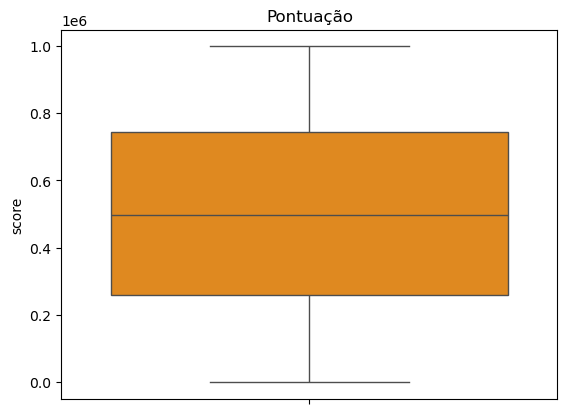

In [147]:
# boxplot: verificar outliers (valores fora do conjunto)
srn.boxplot(df['score'], color='darkorange').set_title('Pontuação')

Text(0.5, 1.0, 'Pontuação')

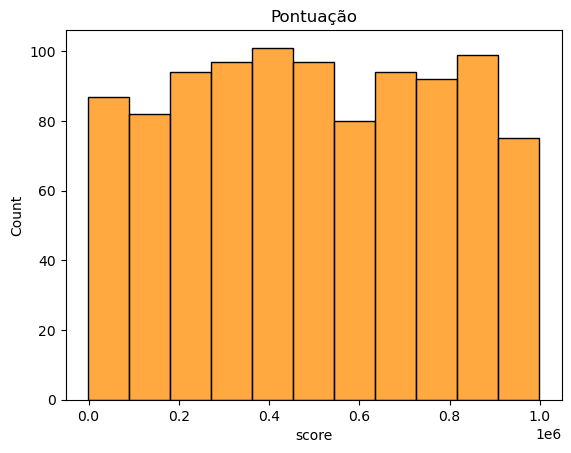

In [150]:
# histograma: distribuição das frequencias
srn.histplot(df['score'], color='darkorange').set_title('Pontuação')

Analisando a coluna 'score', vemos que há valores negativos, o que não faz sentido nesse contexto, já que o score deve variar entre 0 e 1.000.000. Mesmo que o boxplot não tenha destacado esses valores como outliers, eles claramente estão fora do intervalo permitido.

* ### Coluna: nivel

Text(0.5, 1.0, 'Nivel')

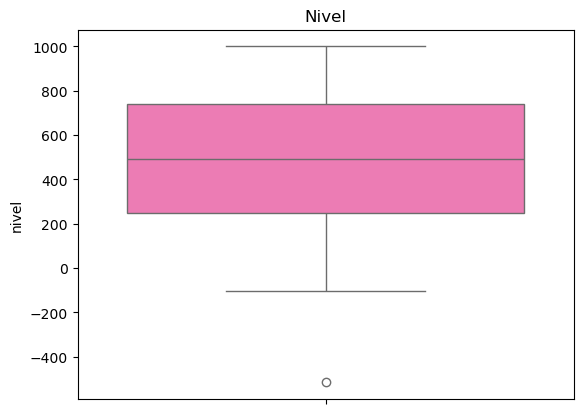

In [151]:
# boxplot: verificar outliers (valores fora do conjunto)
srn.boxplot(df['nivel'], color='hotpink').set_title('Nivel')

Text(0.5, 1.0, 'Nivel')

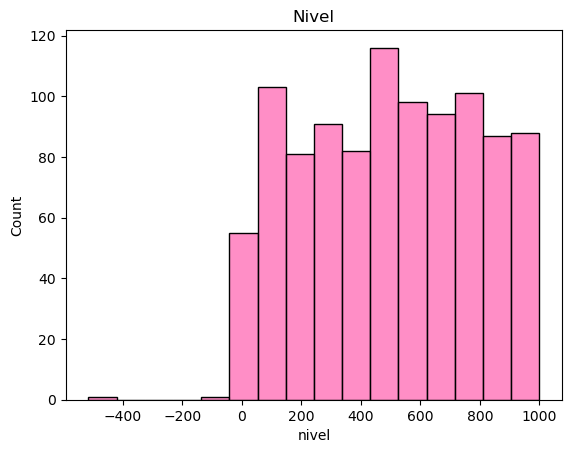

In [152]:
# histograma: distribuição das frequencias
srn.histplot(df['nivel'], color='hotpink').set_title('Nivel')

Na coluna 'nivel', além de existir valor negativo (o que já é inválido, já que o nível no jogo deve estar entre 0 e 1000), o próprio boxplot já identificou esses valores negativos como outliers. Ou seja, além de estarem fora da faixa permitida pelas regras do jogo, eles também se destacam graficamente como anomalias. Esses dados precisam ser tratados

* ### Coluna: idade

Text(0.5, 1.0, 'Idade')

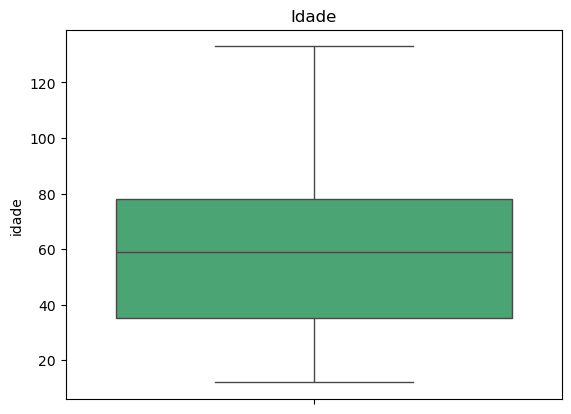

In [153]:
# boxplot: verificar outliers (valores fora do conjunto)
srn.boxplot(df['idade'], color='mediumseagreen').set_title('Idade')

Text(0.5, 1.0, 'Idade')

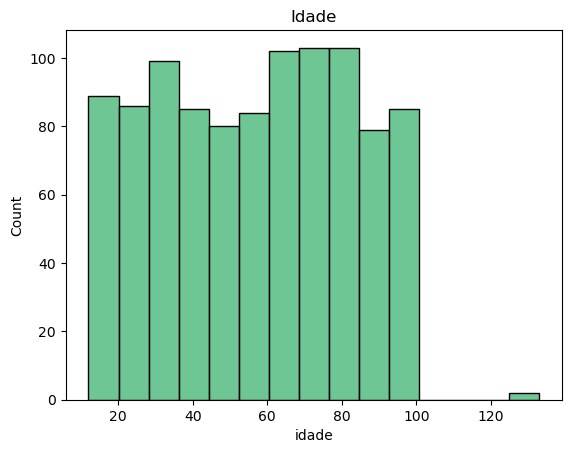

In [154]:
# histograma: distribuição das frequencias
srn.histplot(df['idade'], color='mediumseagreen').set_title('Idade')

A idade é a coluna que parece mais estável, mas ainda assim apresenta valores acima de 100, o que vai contra as regras da base de dados (onde a idade deve estar entre 0 e 100). Vale destacar que o boxplot não apontou esses valores como outliers, então eles passam despercebidos visualmente. Mesmo assim, por estarem fora da faixa válida, esses dados precisam ser tratados.


# **Tratamento dos Dados**

Agora que já identifiquei os valores nulos e os dados que estão fora das regras, vou começar a tratá-los.

## Dados categoricos

vou substituir os valores ausentes pela **moda**, que é o valor mais frequente e costuma fazer mais sentido nesses casos.

* ### Coluna: categoria

In [173]:
# preenchendo os valores nulos com a moda
df.fillna({'categoria': 'mago'}, inplace = True)

# verificar se ainda existem nulos
df['categoria'].isnull().sum()

0

In [174]:
# Corrigindo erro de digitação: substituindo 'm@go' por 'mago'
df.loc[df['categoria'] == 'm@go', 'categoria'] = 'mago'

# Verificando novamente a contagem de categorias após a correção
df.groupby(['categoria']).size()

categoria
elfo         238
guerreiro    242
mago         279
orc          241
dtype: int64

A coluna categoria tinha 3 valores nulos e um erro de digitação ("m@go").  
Substituí os nulos pela moda ("mago") e corrigi o valor com erro, como foi analisado nos gráficos.  
Agora a coluna não tem mais nulos e os dados estão padronizados.

* ### Coluna: pais

In [175]:
# preenchendo os valores nulos com a moda
df.fillna({'pais': 'Brazil'}, inplace = True)

# verificar se ainda existem nulos
df['pais'].isnull().sum()

0

In [176]:
# Corrigindo os erros de digitação na coluna 'pais'
df['pais'] = df['pais'].replace({
    '%apan': 'Japan',
    'C#nada': 'Canada',
    'Portuga&': 'Portugal'
})

# Verificando novamente a contagem de paises após a correção
df.groupby(['pais']).size()

pais
Australia           7
Brazil            281
Canada             94
Italy              10
Japan             131
Mexico             74
Portugal          223
Spain              14
United Kingdom     16
United States     150
dtype: int64

A coluna pais tinha 2 valores nulos e 3 erros de digitação: "%apan", "C#nada" e "Portuga&".  
Corrigi os valores com erro para "Japan", "Canada" e "Portugal", e preenchi os nulos com a moda da coluna.  
Agora os dados estão completos e padronizados.

## Dados numéricos

vou substituir os valores inválidos ou ausentes pela mediana, já que ela não é afetada por outliers e representa melhor o centro da distribuição.

* ### Coluna: score
    
    Para fins didáticos, vou seguir a orientação de substituir os valores inválidos de score pela mediana.  
    No entanto, se essa base estivesse sendo usada em um cenário real de competição, essa substituição poderia ser injusta com os outros participantes.  
    O mais adequado seria zerar esses valores, já que não temos como saber a pontuação real que faltou.  
    Por isso, deixo abaixo, comentado, o código que eu usaria nesse caso.






In [177]:
#calcular a mediana da pontuação
mediana_score = sts.median(df["score"])

mediana_score

456111.5

In [178]:
#relembrando o resumo estatístico
df['score'].describe()

count       998.000000
mean     496350.856713
std      283458.860428
min        -464.000000
25%      259577.250000
50%      497023.500000
75%      745172.500000
max      998871.000000
Name: score, dtype: float64

In [179]:
# preencher os valores nulos com a mediana
df.fillna({'score' : mediana_score }, inplace=True)

# Tratamento mais adequado em contexto de competição (comentado):
# df.fillna({'score' :0 }, inplace=True)

# verificar se ainda existem nulos
df['score'].isnull().sum()

0

In [180]:
# Substituindo os valores inválidos de score pela mediana
df.loc[(df["score"] < 0) | (df["score"] > 1000000), "score"] = mediana_score

# Tratamento mais adequado em um contexto de competição (comentado):
# df.loc[(df['score'] < 0) | (df['score'] > 1000000), 'score'] = 0

# Verificando os dados da coluna score após o tratamento
df['score'].describe()

count      1000.000000
mean     496726.953500
std      282746.734129
min         884.000000
25%      260677.500000
50%      495862.000000
75%      744387.500000
max      998871.000000
Name: score, dtype: float64

A coluna score tinha 2 valores nulos e outros fora do intervalo permitido.  
Substituí todos eles pela mediana da coluna, conforme foi orientado na atividade.  
Com isso, os dados agora estão completos e dentro das regras estabelecidas.

* ### Coluna: nivel

In [181]:
#calcular a mediana do nivel
mediana_nivel = sts.median(df["nivel"])

mediana_nivel

14.0

In [182]:
#relembrando o resumo estatístico
df['nivel'].describe()

count     998.000000
mean      495.098196
std       288.395089
min      -516.000000
25%       247.750000
50%       493.500000
75%       742.000000
max      1000.000000
Name: nivel, dtype: float64

In [183]:
# preencher os valores nulos com a mediana
df.fillna({'nivel' : mediana_nivel }, inplace=True)

# verificar se ainda existem nulos
df['nivel'].isnull().sum()

0

In [184]:
# Substituindo os valores inválidos de nivel pela mediana
df.loc[(df["nivel"] < 0) | (df["nivel"] > 1000), "nivel"] = mediana_nivel

# Verificando os dados da nivel score após o tratamento
df['nivel'].describe()

count    1000.000000
mean      494.783000
std       287.315931
min         1.000000
25%       246.750000
50%       492.500000
75%       742.000000
max      1000.000000
Name: nivel, dtype: float64

A coluna nivel também apresentava 2 valores nulos e alguns fora do intervalo permitido (valores negativos e acima de 1000).  
Substituí esses dados inválidos e ausentes pela mediana da coluna, conforme instrução em sala.  
Agora os valores estão completos e dentro das regras definidas.

* ### Coluna: idade

In [185]:
#calcular a mediana da idade
mediana_idade = sts.median(df["idade"])

mediana_idade

43.0

In [186]:
#relembrando o resumo estatístico
df['idade'].describe()

count    997.000000
mean      56.822467
std       25.249907
min       12.000000
25%       35.000000
50%       59.000000
75%       78.000000
max      133.000000
Name: idade, dtype: float64

In [187]:
# preencher os valores nulos com a mediana
df.fillna({'idade' : mediana_idade }, inplace=True)

# verificar se ainda existem nulos
df['idade'].isnull().sum()

0

In [188]:
# Substituindo os valores inválidos de idade pela mediana
df.loc[(df["idade"] < 0) | (df["idade"] > 100), "idade"] = mediana_idade

# Verificando os dados da idade score após o tratamento
df['idade'].describe()

count    1000.000000
mean       56.609000
std        25.021835
min        12.000000
25%        35.000000
50%        58.000000
75%        78.000000
max       100.000000
Name: idade, dtype: float64

A coluna idade tinha 3 valores nulos e alguns acima de 100, o que ultrapassa o limite estabelecido.  
Todos esses valores foram substituídos pela mediana da coluna.  
Com isso, a coluna passou a respeitar as regras da base e não possui mais dados ausentes ou inválidos.

# **Conclusão**

Com a análise e o tratamento que fiz, o dataframe agora está padronizado, sem valores nulos e com todos os dados dentro das regras definidas.  
Corrigi erros de digitação, tratei valores inválidos e preenchi campos ausentes, sempre pensando no impacto que essas alterações teriam em um cenário real, principalmente em sistemas de pontuação e colocação.

Mesmo seguindo a orientação didática de substituir valores inválidos pela mediana, eu parei pra refletir sobre o que isso significaria fora do exercício.  
Se essa base fosse usada em uma competição de verdade, preencher pontuações inválidas com estimativas poderia distorcer o ranking e acabar sendo injusto com os outros participantes.  
Por isso, deixei comentado no código a abordagem que considero mais justa nesse tipo de caso: zerar os valores perdidos.

Também acho importante destacar que, em uma situação real, o ideal nem seria eu corrigir esse tipo de erro diretamente.  
Se os dados estão errados, como scores negativos ou nulos, isso indica um problema na forma como foram coletados.  
O certo seria acionar quem inseriu essas informações e pedir uma justificativa ou uma correção na origem.  
Corrigir tudo localmente, sem tratar a causa do erro, pode acabar mascarando falhas graves no processo.

Durante a análise, também pensei sobre a natureza da base.  
Mesmo sem nomes ou identificadores únicos, tudo nela: score, nível, idade, país e categoria, aponta pra um jogador individual.  
Provavelmente os nomes foram removidos por simplicidade didática, já que strings únicas não agregam valor estatístico nesse tipo de análise.
Isso me fez lembrar de como é importante não assumir o que os dados representam logo de cara, e sempre considerar o contexto antes de tratar ou tirar conclusões.

Além disso, refleti que informações que remetem a pessoas são mais sensíveis à falsificação ou erro, porque são diretamente associadas a alguém que pode ser afetado.  
Diferente de dados genéricos ou científicos (como de plantas ou objetos), dados sobre pessoas serão, na maioria das vezes, vistos pela própria pessoa, o que exige ainda mais cuidado e responsabilidade no tratamento.

No geral, esse exercício me ajudou não só a praticar técnicas de análise e tratamento, mas também a desenvolver um olhar mais crítico sobre o que os dados significam, de onde vem e o impacto que pequenas decisões podem ter em uma análise real.

